In [1]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap,ScalarMappable
from matplotlib.colors import Normalize
import pandas as pd
import numpy as np
import h5py
import os

In [2]:
def get_rates(file):
    
    f = h5py.File(file, 'r')
    coeffs=f['Collisional Coeffs']

    el_loss=coeffs["Electron Loss Collisions"][()]
    temp=f['Temperature axis'][()]
    el_neut=coeffs["Electron Neutral Collisions"][()]
    prot_neut=coeffs["Proton Neutral Collisions"][()]

    el_loss_sum=np.sum(el_loss,axis=1)
    el_loss_e=el_loss_sum[0]
    el_loss_p=el_loss_sum[1]
    el_neut_ex=calculate_ex(el_neut)
    prot_neut_ex=calculate_ex(prot_neut)
    el_neut_deex=calculate_deex(el_neut)
    prot_neut_deex=calculate_deex(prot_neut)

    return el_loss_e,el_loss_p,el_neut_ex,el_neut_deex,prot_neut_ex,prot_neut_deex,temp

In [3]:
def plot_coeffs(file,save=False,path=''):
    
    name=file.split('/')[-1]
    el_loss_e,el_loss_p,el_neut_ex,el_neut_deex,prot_neut_ex,prot_neut_deex,temp=get_rates(file)

    plt.style.use('plot_style')
    plt.plot(temp,el_loss_e)
    plt.plot(temp,el_loss_p)
    plt.plot(temp,el_neut_ex,c='C2')
    plt.plot(temp,el_neut_deex,'--',c='C2')
    plt.plot(temp,prot_neut_ex,c='C3')
    plt.plot(temp,prot_neut_deex,'--',c='C3')
    plt.yscale('log')
    plt.xscale('log')
    plt.grid(which='both')
    plt.title(name)
    plt.xlabel('Temperature [eV]')
    plt.ylabel(r'Reduced rate coeff. [cm$^2$]')
    plt.legend(['e ion.','p ion.','e ex.','e deex.','p ex.','p deex.'])
    if save:
        plt.savefig(path+name[:-3],facecolor='white',transparent=True, bbox_inches='tight', pad_inches=0.5)
        print(name)
        plt.close()
    else:
        plt.show()

In [4]:
def calculate_ex(rate_mx):
    mx_shape=np.shape(rate_mx)
    excit=np.zeros((mx_shape[-1]))
    for i in range(mx_shape[0]):
        excit=excit+np.sum(rate_mx[i,i:,:],axis=0)
    return excit

In [5]:
def calculate_deex(rate_mx):
    mx_shape=np.shape(rate_mx)
    excit=np.zeros((mx_shape[-1]))
    for i in range(mx_shape[0]):
        excit=excit+np.sum(rate_mx[i,:i,:],axis=0)
    return excit

In [51]:
def plot_many_energy(rate_list,temp,energy,name,save=False,path=''):
    plt.style.use('plot_style')
    cmap = get_cmap('viridis')
    max_en=np.max(energy)

    fig=plt.gcf()
    scmap=ScalarMappable(norm=Normalize(vmin=np.min(energy), vmax=max_en, clip=False),cmap=cmap)
    scmap.set_array([])
    cb=fig.colorbar(scmap)
    cb.set_label(label='Beam energy [keV]',fontsize=22,rotation=-90,labelpad=30)
    cb.ax.tick_params(labelsize=18)

    for i in range(len(rate_list)):
        c=cmap(energy[i]/max_en)
        plt.plot(temp[i],rate_list[i],color=c)

    plt.yscale('log')
    plt.xscale('log')
    plt.grid(which='both')
    plt.title(name)
    plt.xlabel('Temperature [eV]')
    plt.ylabel(r'Reduced rate coeff. [cm$^2$]')
    if save:
        plt.savefig(path+name,facecolor='white',transparent=True, bbox_inches='tight', pad_inches=0.5)
        print(name)
        plt.close()
    else:
        plt.show()

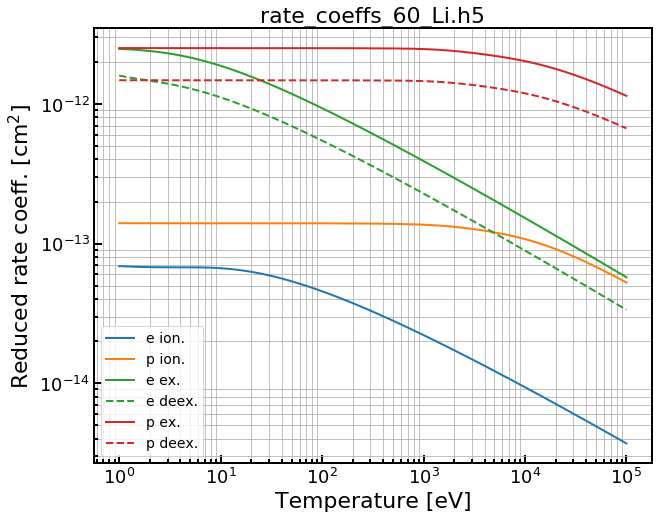

In [6]:
file='/home/balazsp/.local/lib/python3.6/site-packages/renate-od/data/atomic_data/Li/rates/default/rate_coeffs_60_Li.h5'
plot_coeffs(file)

In [12]:
Li_dir='/home/balazsp/.local/lib/python3.6/site-packages/renate-od/data/atomic_data/Li/rates/default/'
Na_dir='/home/balazsp/.local/lib/python3.6/site-packages/renate-od/data/atomic_data/Na/rates/default/'

In [ ]:
for directory in [Li_dir,Na_dir]:
    for file in os.listdir(directory):
        plot_coeffs(directory+file,save=True,path='../plots/RENATE rates/')

In [52]:
type_dict={'ele':'e_impact_ion','elp':'p_impact_ion','ene':'e_impact_ex','end':'e_impact_deex','pne':'p_impact_ex','pnd':'p_impact_deex'}

for directory in [Li_dir,Na_dir]:
    element=directory.split('/')[-4]
    energy=[]
    data={'ele':[],'elp':[],'ene':[],'end':[],'pne':[],'pnd':[],'temp':[]}
    rate_lists=list(data.values())
    for file in os.listdir(directory):
        filename=directory+file
        energy.append(int(file[-8:-6]))
        rates=get_rates(filename)
        for i in range(len(rate_lists)):
            rate_lists[i].append(rates[i])

    for key,rlist in data.items():
        if not key=='temp':
            name=element+'_'+type_dict[key]
            plot_many_energy(rlist,data['temp'],energy,name,save=True,path='../plots/RENATE rates/')



Li_e_impact_ion
Li_p_impact_ion
Li_e_impact_ex
Li_e_impact_deex
Li_p_impact_ex
Li_p_impact_deex
Na_e_impact_ion
Na_p_impact_ion
Na_e_impact_ex
Na_e_impact_deex
Na_p_impact_ex
Na_p_impact_deex
